# <font color='blue'><font size="6">Soundtrack Attribute Analysis</font>

**<font size="5">Introduction</font>**

My research questions involve looking at variables that have an impact on a song or soundtrack's popularity rating. What variables influence whether a song is popular on spotify or not? The original data is found on kaggle as a training dataset, which was fetched from Spotify's Web API randomly. There are approximately 440,000 rows of data, with different datatypes (string, int, float). I do not look at how popularity was derived, but instead, my goal would be looking at the relationship between popularity and the other attributes. For modern purposes, I have excluded songs older than 1950 from my analysis. 

The attribute descriptions are found at: https://developer.spotify.com/documentation/web-api/reference/#/operations/get-audio-features

Attributes in Analysis (19 attributes) = song_name, artist_name, popularity, year, acousticness, danceability, duration_ms, seconds, energy, instrumentalness, key, liveness, loudness, mode

Attributes that I conduct hypotheses testing on: 
1. popularity
2. year
3. seconds
4. energy
5. danceability

**<font size="5">Imports and Dataframes</font>**

In [3]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import math
import warnings
warnings.filterwarnings('ignore')

In [4]:
#some problems with a few csv rows which prevented loading in read_csv function, so I skipped them
df = pd.read_csv("https://raw.githubusercontent.com/j0hn5on177/Thinkful_Projects/Main/Soundtrack_Attribute_Analysis_Pynb/spotify_tracks_metadata_cleaned.csv", error_bad_lines=False)

In [5]:
df

,Unnamed: 0,song_name,artist_name,song_popularity,album_release_year,acousticness,danceability,duration_ms,duration_seconds,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
0,0,drivers license,Olivia Rodrigo,100,2021.0,0.72100,0.585,242014,242.014,0.436,0.000013,10,0.1050,-8.761,1,0.0601,143.874,4,0.132
1,1,Save Your Tears,The Weeknd,96,2020.0,0.02120,0.680,215627,215.627,0.826,0.000012,0,0.5430,-5.487,1,0.0309,118.051,4,0.644
2,2,Blinding Lights,The Weeknd,96,2020.0,0.00146,0.514,200040,200.040,0.730,0.000095,1,0.0897,-5.934,1,0.0598,171.005,4,0.334
3,3,Mood (feat. iann dior),24kGoldn,95,2020.0,0.22100,0.700,140526,140.526,0.722,0.000000,7,0.2720,-3.558,0,0.0369,90.989,4,0.756
4,4,WITHOUT YOU,The Kid LAROI,94,2020.0,0.21300,0.662,161385,161.385,0.413,0.000000,0,0.1340,-7.357,1,0.0299,93.005,4,0.467
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
439888,439888,Aarti Durga Maa Ki,Anuradha Paudwal,0,2021.0,0.41500,0.587,317759,317.759,0.587,0.000000,11,0.6000,-8.828,1,0.0325,89.976,4,0.564
439889,439889,Aaramangal,K. S. Chithra,0,2021.0,0.52100,0.748,312375,312.375,0.482,0.000006,9,0.2380,-8.669,0,0.0303,113.019,4,0.910
439890,439890,"Aarti (Lovthavti Vikrala) [From ""Shankara Karu...",Anuradha Paudwal,0,2021.0,0.60800,0.672,126457,126.457,0.380,0.000000,5,0.0799,-10.281,0,0.0349,100.613,3,0.908
439891,439891,Aa Bhi Jao Ki,Kavita Krishnamurthy,0,2021.0,0.08910,0.777,337536,337.536,0.556,0.000891,4,0.0896,-10.777,1,0.0263,106.999,4,0.784


**<font size="5">Basic EDA</font>**
1. Looked at which part of the dataset I was keeping which was songs released in 1950 and later
2. Dropped a few nulls 
3. Looked at the means of popularity ratings by year 


In [6]:
# rename column rows and only use soundtracks released in 1950 and later
renamed_df = df.rename(columns = {'Unnamed: 0': 'Index Num', 'song_popularity': 'popularity', 'album_release_year': 'year','duration_seconds': 'seconds'})
df_1950 = renamed_df['year'] >= 1950
df_spotify1 = renamed_df.loc[df_1950]

In [7]:
# check if years actually begin at 1950 (answer is yes)
df_spotify1.sort_values(by='year')
# found a few nulls in song name and artist name, which is insignificant compared to 440,000 rows 
df_spotify1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 439529 entries, 0 to 439892
Data columns (total 19 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Index Num         439529 non-null  int64  
 1   song_name         439527 non-null  object 
 2   artist_name       439520 non-null  object 
 3   popularity        439529 non-null  int64  
 4   year              439529 non-null  float64
 5   acousticness      439529 non-null  float64
 6   danceability      439529 non-null  float64
 7   duration_ms       439529 non-null  int64  
 8   seconds           439529 non-null  float64
 9   energy            439529 non-null  float64
 10  instrumentalness  439529 non-null  float64
 11  key               439529 non-null  int64  
 12  liveness          439529 non-null  float64
 13  loudness          439529 non-null  float64
 14  mode              439529 non-null  int64  
 15  speechiness       439529 non-null  float64
 16  tempo             43

In [8]:
# dropped the few nulls from the dataframe 
df_tracks = df_spotify1.dropna()
df_tracks.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 439519 entries, 0 to 439892
Data columns (total 19 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Index Num         439519 non-null  int64  
 1   song_name         439519 non-null  object 
 2   artist_name       439519 non-null  object 
 3   popularity        439519 non-null  int64  
 4   year              439519 non-null  float64
 5   acousticness      439519 non-null  float64
 6   danceability      439519 non-null  float64
 7   duration_ms       439519 non-null  int64  
 8   seconds           439519 non-null  float64
 9   energy            439519 non-null  float64
 10  instrumentalness  439519 non-null  float64
 11  key               439519 non-null  int64  
 12  liveness          439519 non-null  float64
 13  loudness          439519 non-null  float64
 14  mode              439519 non-null  int64  
 15  speechiness       439519 non-null  float64
 16  tempo             43

In [9]:
df_tracks.describe().T

,count,mean,std,min,25%,50%,75%,max
Index Num,439519.0,219999.702004,126979.750790,0.000,110049.5000,220029.000000,329966.500,439892.000
popularity,439519.0,22.801492,18.516217,0.000,7.0000,20.000000,36.000,100.000
year,439519.0,2015.093614,8.381108,1950.000,2014.0000,2018.000000,2020.000,2021.000
acousticness,439519.0,0.332380,0.320259,0.000,0.0396,0.224000,0.586,0.996
danceability,439519.0,0.616962,0.177984,0.000,0.5150,0.647000,0.743,0.994
duration_ms,439519.0,213395.628437,124000.221885,1864.000,154000.0000,199393.000000,247333.000,6024647.000
seconds,439519.0,213.395628,124.000222,1.864,154.0000,199.393000,247.333,6024.647
energy,439519.0,0.585028,0.249029,0.000,0.4120,0.610000,0.786,1.000
instrumentalness,439519.0,0.188696,0.338795,0.000,0.0000,0.000021,0.148,1.000
key,439519.0,5.289148,3.606940,0.000,2.0000,5.000000,8.000,11.000


**<font size="5">Visualizations and Descriptives</font>**

###### <font size="4">1. Popularity Rating (0-100)</font>

Majority of songs fall under a rating of 60
- Popularity ratings are skewed to the left, with many songs falling under a rating of 80. 
- 99% of the soundtracks have a rating of 80 or under.
- 96% of the soundtracks have a rating of 60 or under. 
- 13% of the soundtracks have a rating of 0. 
- average rating is 22.8

In [10]:
track_pop = df_tracks['popularity']
track_pop.describe()

count    439519.000000
mean         22.801492
std          18.516217
min           0.000000
25%           7.000000
50%          20.000000
75%          36.000000
max         100.000000
Name: popularity, dtype: float64

0.9989
0.9639
0.1341


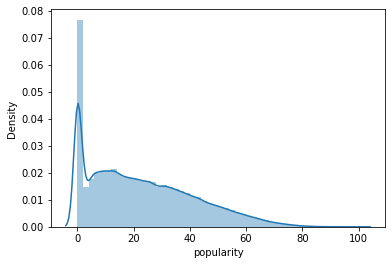

In [11]:
popularity_dist = sns.distplot(df_tracks['popularity'])
track_pop = df_tracks['popularity']
under80 = track_pop.loc[track_pop <= 80].value_counts().sum()
under60 = track_pop.loc[track_pop <= 60].value_counts().sum()
zero_rating = track_pop.loc[track_pop == 0].value_counts().sum()
print(round(under80/ track_pop.value_counts().sum(), 4))
print(round(under60/ track_pop.value_counts().sum(), 4))
print(round(zero_rating/ track_pop.value_counts().sum(), 4))

<AxesSubplot:xlabel='year', ylabel='popularity'>

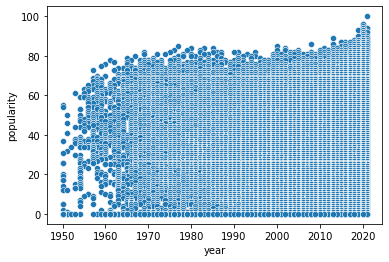

In [12]:
sns.scatterplot(x='year', y='popularity',data=df_tracks)

###### <font size="4">2. Year Released (1950-2021)</font>

Majority of songs in this dataset is from 2010 and later
- data skewed to the right
- possibly due to ease of access for high quality equipment or technology for home use, resulting in a larger quantity of songs produced than any previous decade
- possible due to random chance when original data was fetched from Spotify Web API
- 85% of soundtracks are from 2010 and later

In [13]:
track_year = df_tracks['year']
track_year.describe()

count    439519.000000
mean       2015.093614
std           8.381108
min        1950.000000
25%        2014.000000
50%        2018.000000
75%        2020.000000
max        2021.000000
Name: year, dtype: float64

0.8491


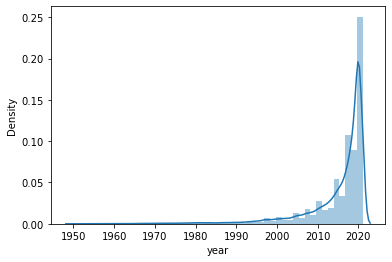

In [14]:

year = sns.distplot(track_year, bins = 50)

year2000 = track_year.loc[track_year >= 2010].value_counts().sum()
print(round(year2000/ track_year.value_counts().sum(), 4))

###### <font size="4">3. Duration (s)</font>

Average song lasted around 213 seconds (3.5 minutes)
- skewed to the left
- 87% of soundtracks have a duration of 300 seconds and under

In [15]:
duration = df_tracks['seconds']
duration.describe()

count    439519.000000
mean        213.395628
std         124.000222
min           1.864000
25%         154.000000
50%         199.393000
75%         247.333000
max        6024.647000
Name: seconds, dtype: float64

0.8765377605973803


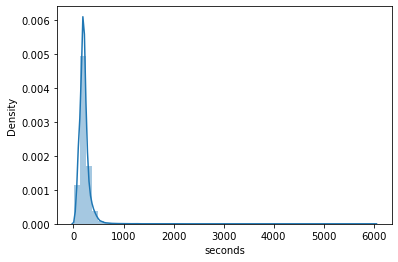

In [16]:
under200 = duration.loc[duration <= 300].value_counts().sum()
seconds = sns.distplot(duration)
print(under200/ duration.value_counts().sum())

###### <font size="4">4. Energy (0-1)</font>
35% of songs fall under an energy rating of 0.5
- skewed just slightly to the right
- average energy rating of a soundtrack is 0.58

In [17]:
energy = df_tracks['energy']
energy.describe()

count    439519.000000
mean          0.585028
std           0.249029
min           0.000000
25%           0.412000
50%           0.610000
75%           0.786000
max           1.000000
Name: energy, dtype: float64

0.3532


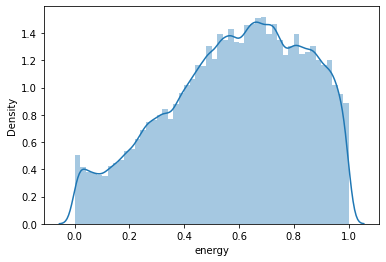

In [18]:
energy_plot = sns.distplot(energy)
energy58 = energy.loc[energy <= .5].value_counts().sum()
print(round(energy58/ energy.value_counts().sum(), 4))

###### <font size="4">5. Danceability (0-1)</font>

- looks like the ratings fall in a relatively normal distribution
- average danceability rating of 0.62

In [19]:
danceability = df_tracks['danceability']
danceability.describe()

count    439519.000000
mean          0.616962
std           0.177984
min           0.000000
25%           0.515000
50%           0.647000
75%           0.743000
max           0.994000
Name: danceability, dtype: float64

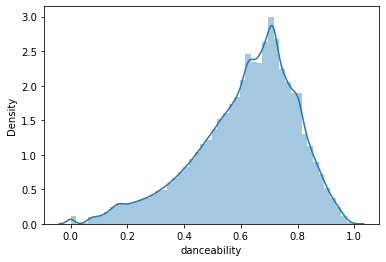

In [20]:
dance_plot = sns.distplot(danceability)

**<font size="5">Hypotheses Testing</font>**

I will be testing the significance of these attributes against the "popularity" variable. 
I will also be using an alpha of (0.05). 
1. Year 
2. Duration
3. Energy Rating
4. Danceability Rating

**<font size="3">Hypothesis 1 (Years): Is there a significant difference in popularity between soundtracks released prior to 2010 vs. tracks released thereafter?</font>**

1. H₀: µ₁ - µ₂ = 0 (No significant difference between popularity means of the 2 groups - tracks released during/after 2010, and tracks released before 2010.)
2. Hₐ: µ₁ - µ₂ ≠ 0 (There is a significant difference between the 2 groups)

In [21]:
## create df for tracks with year >= 2010 and use describe function to make sure
df_after2010 = df_tracks.loc[df_tracks['year'] >= 2010]
df_after2010.describe()

,Index Num,popularity,year,acousticness,danceability,duration_ms,seconds,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
count,373209.00000,373209.000000,373209.000000,373209.000000,373209.000000,3.732090e+05,373209.000000,373209.000000,373209.000000,373209.000000,373209.000000,373209.000000,373209.000000,373209.000000,373209.000000,373209.000000,373209.000000
mean,223321.12060,22.320678,2017.959251,0.323210,0.625773,2.088436e+05,208.843598,0.585877,0.195911,5.289010,0.204714,-9.868242,0.565978,0.194732,119.605038,3.883165,0.464930
std,127270.24653,18.392193,2.870854,0.315194,0.176093,1.214392e+05,121.439178,0.246250,0.344515,3.617998,0.173535,5.902328,0.495628,0.249898,30.197219,0.545824,0.250668
min,0.00000,0.000000,2010.000000,0.000000,0.000000,1.864000e+03,1.864000,0.000000,0.000000,0.000000,0.000000,-60.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,112684.00000,7.000000,2016.000000,0.038900,0.527000,1.518750e+05,151.875000,0.417000,0.000000,2.000000,0.099000,-12.194000,0.000000,0.043400,95.914000,4.000000,0.266000
50%,224079.00000,19.000000,2019.000000,0.214000,0.656000,1.955290e+05,195.529000,0.610000,0.000019,5.000000,0.129000,-8.313000,1.000000,0.076600,120.042000,4.000000,0.458000
75%,334473.00000,35.000000,2020.000000,0.563000,0.750000,2.408490e+05,240.849000,0.783000,0.194000,8.000000,0.262000,-5.903000,1.000000,0.244000,139.867000,4.000000,0.658000
max,439892.00000,100.000000,2021.000000,0.996000,0.994000,6.024647e+06,6024.647000,1.000000,1.000000,11.000000,0.998000,5.285000,1.000000,0.972000,249.810000,5.000000,1.000000


In [22]:
df_before2010 = df_tracks.loc[df_tracks['year'] < 2010]
df_before2010.describe()

,Index Num,popularity,year,acousticness,danceability,duration_ms,seconds,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
count,66310.000000,66310.000000,66310.000000,66310.000000,66310.000000,6.631000e+04,66310.000000,66310.000000,66310.000000,66310.000000,66310.000000,66310.000000,66310.000000,66310.000000,66310.000000,66310.000000,66310.000000
mean,201305.940688,25.507631,1998.965103,0.383989,0.567371,2.390156e+05,239.015574,0.580246,0.148093,5.289926,0.236154,-10.462585,0.620842,0.174725,117.197834,3.852948,0.533894
std,123680.428302,18.973526,10.623289,0.342850,0.180421,1.346890e+05,134.688988,0.264078,0.301400,3.544086,0.206821,5.843750,0.485181,0.266636,30.132641,0.548526,0.260328
min,114.000000,0.000000,1950.000000,0.000000,0.000000,2.000000e+03,2.000000,0.000000,0.000000,0.000000,0.000000,-60.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,96014.500000,10.000000,1995.000000,0.044800,0.451000,1.738130e+05,173.813000,0.381000,0.000000,2.000000,0.098300,-13.297000,0.000000,0.036700,93.986000,4.000000,0.332000
50%,196351.500000,23.000000,2002.000000,0.301500,0.592000,2.255110e+05,225.511000,0.609000,0.000028,5.000000,0.148000,-8.998000,1.000000,0.052000,115.026000,4.000000,0.552000
75%,303837.750000,38.000000,2007.000000,0.696000,0.702000,2.788945e+05,278.894500,0.805000,0.034300,9.000000,0.315000,-6.211000,1.000000,0.144000,135.630750,4.000000,0.746000
max,439839.000000,86.000000,2009.000000,0.996000,0.988000,4.539000e+06,4539.000000,1.000000,1.000000,11.000000,1.000000,2.239000,1.000000,0.969000,243.372000,5.000000,1.000000


**<font size="3">Hypothesis 1 (Years): T-Test</font>**

In [23]:
# generates t-stat and p-value
# popularity ratings not N.D., but large sample should still suffice for t-test
stats.ttest_ind(df_after2010['popularity'], df_before2010['popularity'])

Ttest_indResult(statistic=-40.91902384122793, pvalue=0.0)

- Reject null hypothesis because test shows a significant difference between the 2 tested groups with a p-value less than 0.05. 
- Popularity rating changes drastically for tracks released after 2010. 


**<font size="3">Hypothesis 1 (Years): Confidence Intervals</font>**

In [24]:
#create a function to output Confidence Intervals
def get_95_ci(array1, array2):
  sample1_n = array1.shape[0]
  sample2_n = array2.shape[0]
  sample1_mean = array1.mean()
  sample2_mean = array2.mean()
  sample1_var = array1.var()
  sample2_var = array2.var()
  mean_difference = sample2_mean - sample1_mean
  std_err_dif = math.sqrt((sample1_var/sample1_n) + (sample2_var/sample2_n))
  margin_of_error = 1.96 * std_err_dif
  ci_lower = mean_difference - margin_of_error
  ci_upper = mean_difference + margin_of_error
  return ("The difference in means of popularity at a 95% Confidence Interval is between "+str(ci_lower)+" and "+str(ci_upper)+".")

get_95_ci(df_after2010['popularity'], df_before2010['popularity'])

'The difference in means of popularity at a 95% Confidence Interval is between 3.030946511903916 and 3.3429586861757743.'

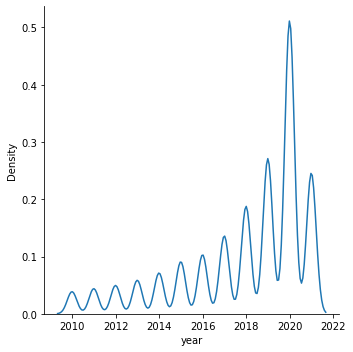

In [25]:
sns.displot(x = 'year', kind='kde',data = df_after2010)

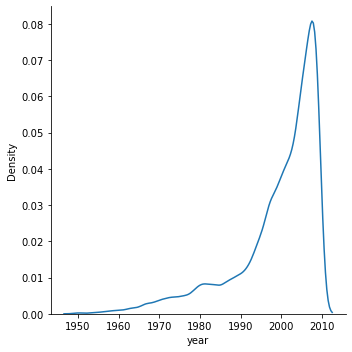

In [26]:
sns.displot(x = 'year', kind='kde',data = df_before2010)

**<font size="3">Hypothesis 2 (Duration): Is there a significant difference in popularity between soundtracks with a duration >= 200s vs. tracks with duration < 200s?</font>**
    
1. H₀: µ₁ - µ₂ = 0 (No significant difference between popularity means of the 2 groups - tracks with a duration of 200 seconds and higher, and tracks shorter than 200 seconds.)
2. Hₐ: µ₁ - µ₂ ≠ 0 (There is a significant difference between the 2 groups)
    

In [27]:
## create df for tracks with duration longer than 200 seconds and use describe function to make sure
df_duration200 = df_tracks.loc[df_tracks['seconds'] >= 200]
df_duration200.describe()

,Index Num,popularity,year,acousticness,danceability,duration_ms,seconds,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
count,218294.000000,218294.000000,218294.000000,218294.000000,218294.000000,2.182940e+05,218294.000000,218294.000000,218294.000000,218294.000000,218294.000000,218294.000000,218294.000000,218294.000000,218294.000000,218294.000000,218294.000000
mean,218131.218224,23.168218,2013.801387,0.293291,0.597681,2.822634e+05,282.263398,0.625179,0.191363,5.338122,0.202364,-8.979628,0.561720,0.130312,121.024160,3.911757,0.459439
std,127950.616495,18.843151,8.740754,0.312546,0.178182,1.407874e+05,140.787449,0.242709,0.335026,3.576931,0.179329,5.205711,0.496177,0.179284,28.651607,0.428596,0.254959
min,0.000000,0.000000,1950.000000,0.000000,0.000000,2.000000e+05,200.000000,0.000000,0.000000,0.000000,0.000000,-52.275000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,105520.000000,7.000000,2012.000000,0.022600,0.487000,2.205260e+05,220.526000,0.469000,0.000000,2.000000,0.095400,-10.833000,0.000000,0.038700,98.084000,4.000000,0.251000
50%,218467.000000,20.000000,2017.000000,0.164000,0.623000,2.477780e+05,247.778000,0.660000,0.000065,6.000000,0.126000,-7.666000,1.000000,0.057000,121.994000,4.000000,0.446000
75%,328668.750000,36.000000,2020.000000,0.513000,0.729000,2.996268e+05,299.626750,0.822000,0.201000,9.000000,0.255000,-5.586000,1.000000,0.136000,138.989000,4.000000,0.659000
max,439891.000000,100.000000,2021.000000,0.996000,0.992000,6.024647e+06,6024.647000,1.000000,1.000000,11.000000,1.000000,4.494000,1.000000,0.971000,249.810000,5.000000,1.000000


In [28]:
df_dur_under200 = df_duration200 = df_tracks.loc[df_tracks['seconds'] < 200]
df_dur_under200.describe()

,Index Num,popularity,year,acousticness,danceability,duration_ms,seconds,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
count,221225.000000,221225.000000,221225.000000,221225.00000,221225.000000,221225.000000,221225.000000,221225.000000,221225.000000,221225.000000,221225.000000,221225.000000,221225.000000,221225.000000,221225.000000,221225.000000,221225.000000
mean,221843.430327,22.439625,2016.368720,0.37095,0.635987,145440.285307,145.440285,0.545408,0.186065,5.240823,0.216457,-10.923231,0.586624,0.252302,117.483182,3.845894,0.491020
std,125987.545717,18.180647,7.803424,0.32309,0.175727,41134.690649,41.134691,0.248841,0.342453,3.635670,0.179010,6.362426,0.492440,0.296068,31.554778,0.640003,0.250777
min,3.000000,0.000000,1950.000000,0.00000,0.000000,1864.000000,1.864000,0.000000,0.000000,0.000000,0.000000,-60.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,114275.000000,7.000000,2016.000000,0.06690,0.547000,118885.000000,118.885000,0.366000,0.000000,2.000000,0.102000,-13.870000,0.000000,0.047400,93.009000,4.000000,0.301000
50%,221558.000000,20.000000,2019.000000,0.29200,0.669000,154375.000000,154.375000,0.558000,0.000006,5.000000,0.137000,-9.352000,1.000000,0.103000,117.975000,4.000000,0.494000
75%,330987.000000,35.000000,2020.000000,0.63900,0.754000,179973.000000,179.973000,0.738000,0.092200,8.000000,0.287000,-6.436000,1.000000,0.333000,139.041000,4.000000,0.685000
max,439892.000000,95.000000,2021.000000,0.99600,0.994000,199999.000000,199.999000,1.000000,1.000000,11.000000,0.998000,5.285000,1.000000,0.972000,248.038000,5.000000,1.000000


**<font size="3">Hypothesis 2 (Duration): T-Test</font>**

In [29]:
# generates t-stat and p-value
# popularity ratings not N.D., but large sample should still suffice for t-test
stats.ttest_ind(df_duration200['popularity'], df_dur_under200['popularity'])

Ttest_indResult(statistic=0.0, pvalue=1.0)

- T-test finds a p-value greater than chosen alpha of 0.05. 
- Test is not significant and we fail to reject the null hypothesis which means there's evidence that duration has no significance on popularity rating. 
- Move on to next test. 

**<font size="3">Hypothesis 3 (Energy Rating): Is there a significant difference in popularity between soundtracks with an energy rating >= 0.6 vs tracks with a rating < 0.6?</font>**

1. H₀: µ₁ - µ₂ = 0 (No significant difference between popularity means of the 2 groups - tracks with an energy rating >= 0.6, and tracks with a rating < 0.6.)
2. Hₐ: µ₁ - µ₂ ≠ 0 (There is a significant difference between the 2 groups)

In [30]:
## create df for tracks with year >= 2010 and use describe function to make sure
df_high_energy = df_tracks.loc[df_tracks['energy'] >= .6]
df_high_energy.describe()

,Index Num,popularity,year,acousticness,danceability,duration_ms,seconds,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
count,225761.000000,225761.000000,225761.000000,225761.000000,225761.000000,2.257610e+05,225761.000000,225761.000000,225761.000000,225761.000000,225761.000000,225761.000000,225761.000000,225761.000000,225761.000000,225761.000000,225761.000000
mean,209630.444931,24.273240,2015.097643,0.177667,0.632312,2.234557e+05,223.455668,0.786066,0.145838,5.397088,0.229226,-6.582572,0.557319,0.148260,123.625608,3.945141,0.534778
std,126178.378126,18.699801,7.534339,0.215392,0.156403,1.089467e+05,108.946703,0.112299,0.299187,3.623836,0.195748,2.871748,0.496705,0.168544,28.520881,0.380779,0.248480
min,1.000000,0.000000,1950.000000,0.000000,0.000000,2.554000e+03,2.554000,0.600000,0.000000,0.000000,0.000000,-42.799000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,100002.000000,9.000000,2013.000000,0.011200,0.537000,1.727460e+05,172.746000,0.689000,0.000000,2.000000,0.097900,-7.960000,0.000000,0.045500,100.027000,4.000000,0.346000
50%,204941.000000,22.000000,2018.000000,0.084100,0.651000,2.094430e+05,209.443000,0.781000,0.000012,6.000000,0.148000,-6.219000,1.000000,0.075600,124.012000,4.000000,0.544000
75%,315657.000000,37.000000,2020.000000,0.276000,0.746000,2.538060e+05,253.806000,0.880000,0.027600,9.000000,0.312000,-4.740000,1.000000,0.193000,140.062000,4.000000,0.733000
max,439885.000000,96.000000,2021.000000,0.996000,0.994000,6.024647e+06,6024.647000,1.000000,1.000000,11.000000,1.000000,5.285000,1.000000,0.968000,249.810000,5.000000,1.000000


In [31]:
df_low_energy = df_tracks.loc[df_tracks['energy'] < .6]
df_low_energy.describe()

,Index Num,popularity,year,acousticness,danceability,duration_ms,seconds,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
count,213758.000000,213758.000000,213758.000000,213758.000000,213758.000000,2.137580e+05,213758.000000,213758.000000,213758.000000,213758.000000,213758.000000,213758.000000,213758.000000,213758.000000,213758.000000,213758.000000,213758.000000
mean,230951.216549,21.247102,2015.089358,0.495780,0.600750,2.027707e+05,202.770695,0.372701,0.233961,5.175147,0.188579,-13.522782,0.592142,0.237607,114.611963,3.808335,0.412554
std,126904.304910,18.191540,9.191122,0.331531,0.196948,1.373315e+05,137.331457,0.162559,0.370784,3.585490,0.157447,6.169252,0.491438,0.311592,31.215635,0.671555,0.243103
min,0.000000,0.000000,1950.000000,0.000000,0.000000,1.864000e+03,1.864000,0.000000,0.000000,0.000000,0.000000,-60.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,122046.250000,6.000000,2014.000000,0.177000,0.481000,1.336830e+05,133.683000,0.258000,0.000000,2.000000,0.099500,-16.560000,0.000000,0.039100,89.979000,4.000000,0.213000
50%,237002.000000,18.000000,2019.000000,0.505000,0.641000,1.853910e+05,185.391000,0.405000,0.000043,5.000000,0.121000,-12.084000,1.000000,0.065900,114.161500,4.000000,0.393000
75%,342591.750000,34.000000,2020.000000,0.801000,0.738000,2.388615e+05,238.861500,0.510000,0.541000,8.000000,0.217000,-9.106250,1.000000,0.307000,134.953000,4.000000,0.591000
max,439892.000000,100.000000,2021.000000,0.996000,0.992000,5.903468e+06,5903.468000,0.599000,1.000000,11.000000,0.995000,3.858000,1.000000,0.972000,248.038000,5.000000,1.000000


**<font size="3">Hypothesis 3 (Energy): T-Test</font>**

In [32]:
# generates t-stat and p-value
# popularity ratings not N.D., but large sample should still suffice for t-test
stats.ttest_ind(df_high_energy['popularity'], df_low_energy['popularity'])

Ttest_indResult(statistic=54.335872190359304, pvalue=0.0)

- Reject null hypothesis because test shows a significant difference between the 2 tested groups with a p-value less than 0.05.
- Energy rating has a significant change on popularity. 

**<font size="3">Hypothesis 3 (Energy): Confidence Intervals</font>**

In [33]:
get_95_ci(df_low_energy['popularity'], df_high_energy['popularity'])

'The difference in means of popularity at a 95% Confidence Interval is between 2.917061851860417 and 3.13521499259155.'

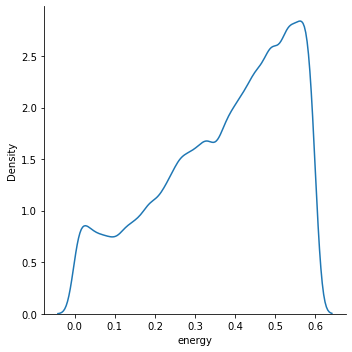

In [34]:
sns.displot(x = 'energy', kind='kde',data = df_low_energy)

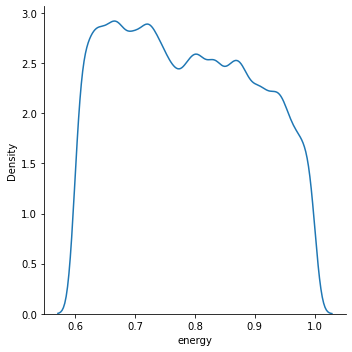

In [35]:
sns.displot(x = 'energy', kind='kde',data = df_high_energy)

<AxesSubplot:xlabel='energy', ylabel='Count'>

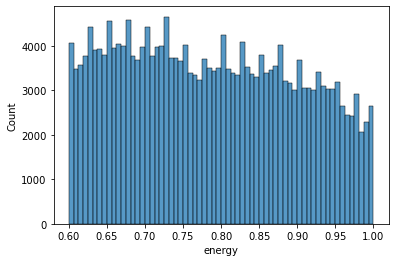

In [36]:
sns.histplot(x = 'energy',data = df_high_energy)

**<font size="3">Hypothesis 4 (Danceability Rating): Is there a significant difference in popularity between soundtracks with a danceability rating >= 0.6 vs tracks with a rating < 0.6?</font>**
    
1. H₀: µ₁ - µ₂ = 0 (No significant difference between popularity means of the 2 groups - tracks with a danceability rating >= 0.6, and tracks with a rating less than 0.6.)
2. Hₐ: µ₁ - µ₂ ≠ 0 (There is a significant difference between the 2 groups)

In [37]:
## create df for tracks with year >= 2010 and use describe function to make sure
df_high_dance = df_tracks.loc[df_tracks['danceability'] >= .6]
df_high_dance.describe()

,Index Num,popularity,year,acousticness,danceability,duration_ms,seconds,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
count,267502.000000,267502.000000,267502.000000,267502.000000,267502.000000,2.675020e+05,267502.000000,267502.000000,267502.000000,267502.000000,267502.000000,267502.000000,267502.000000,267502.000000,267502.000000,267502.000000,267502.000000
mean,220899.952258,22.700499,2016.000258,0.283280,0.732125,2.033130e+05,203.312967,0.601803,0.143423,5.339721,0.195955,-9.286865,0.557487,0.239670,118.398818,3.915545,0.541311
std,127225.204065,18.567970,7.231670,0.270606,0.083597,1.044324e+05,104.432357,0.213236,0.302596,3.639194,0.161084,4.706482,0.496685,0.285055,26.073830,0.471497,0.236877
min,1.000000,0.000000,1950.000000,0.000000,0.600000,1.536000e+04,15.360000,0.000020,0.000000,0.000000,0.006300,-46.547000,0.000000,0.022100,30.506000,0.000000,0.000000
25%,110324.000000,7.000000,2015.000000,0.045200,0.665000,1.502180e+05,150.218000,0.452000,0.000000,2.000000,0.096200,-11.592000,0.000000,0.049600,98.006000,4.000000,0.362000
50%,221875.500000,20.000000,2019.000000,0.193000,0.720000,1.924640e+05,192.464000,0.618000,0.000003,6.000000,0.127000,-8.232000,1.000000,0.103000,120.002000,4.000000,0.546000
75%,331108.750000,35.000000,2020.000000,0.477000,0.791000,2.355195e+05,235.519500,0.769000,0.011600,9.000000,0.253000,-5.979000,1.000000,0.303000,133.974000,4.000000,0.727000
max,439892.000000,96.000000,2021.000000,0.996000,0.994000,6.024647e+06,6024.647000,1.000000,1.000000,11.000000,0.998000,4.363000,1.000000,0.972000,247.836000,5.000000,1.000000


In [38]:
df_low_dance = df_tracks.loc[df_tracks['danceability'] < .6]
df_low_dance.describe()

,Index Num,popularity,year,acousticness,danceability,duration_ms,seconds,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
count,172017.000000,172017.000000,172017.000000,172017.000000,172017.000000,1.720170e+05,172017.000000,172017.000000,172017.000000,172017.000000,172017.000000,172017.000000,172017.000000,172017.000000,172017.000000,172017.000000,172017.000000
mean,218599.731399,22.958545,2013.683700,0.408734,0.437872,2.290751e+05,229.075080,0.558941,0.259101,5.210502,0.230455,-11.001446,0.600330,0.117137,120.552877,3.821163,0.372736
std,126584.753546,18.434401,9.740882,0.372305,0.131817,1.480655e+05,148.065453,0.294326,0.377813,3.554782,0.202664,7.254470,0.489832,0.165915,35.640809,0.641505,0.243833
min,0.000000,0.000000,1950.000000,0.000000,0.000000,1.864000e+03,1.864000,0.000000,0.000000,0.000000,0.000000,-60.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,109617.000000,7.000000,2012.000000,0.028000,0.363000,1.632400e+05,163.240000,0.320000,0.000000,2.000000,0.103000,-14.116000,0.000000,0.036800,90.409000,4.000000,0.169000
50%,217243.000000,20.000000,2017.000000,0.316000,0.473000,2.120000e+05,212.000000,0.591000,0.000628,5.000000,0.139000,-8.774000,1.000000,0.049700,120.034000,4.000000,0.343000
75%,327776.000000,36.000000,2020.000000,0.793000,0.543000,2.652270e+05,265.227000,0.820000,0.667000,8.000000,0.300000,-5.887000,1.000000,0.104000,145.205000,4.000000,0.548000
max,439888.000000,100.000000,2021.000000,0.996000,0.599000,5.903468e+06,5903.468000,1.000000,1.000000,11.000000,1.000000,5.285000,1.000000,0.968000,249.810000,5.000000,1.000000


**<font size="3">Hypothesis 4 (Danceability): T-Test</font>**

In [39]:
# generates t-stat and p-value
# popularity ratings not N.D., but large sample should still suffice for t-test
stats.ttest_ind(df_high_dance['popularity'], df_low_dance['popularity'])

Ttest_indResult(statistic=-4.509347762207383, pvalue=6.504401181325645e-06)

- Reject null hypothesis because test shows a significant difference between the 2 tested groups with a p-value significantly less than alpha (0.05).
- Danceabiltiy rating has a significant change in popularity. 

**<font size="3">Hypothesis 4 (Danceability): Confidence Intervals</font>**

In [40]:
get_95_ci(df_low_dance['popularity'], df_high_dance['popularity'])

'The difference in means of popularity at a 95% Confidence Interval is between -0.37002968688487137 and -0.14606103206103957.'

- Reject null hypothesis because test shows a significant difference between the 2 tested groups with a p-value less than alpha (0.05). 
- Energy rating has a significant change on popularity. 

**<font size="5">Results of Hypotheses Testing</font>**

1. There is a significant difference in popularity ratings of soundtracks released in 2010 and thereafter. 
2. There is NO significant difference in popularity ratings of soundtracks with longer durations or shorter durations. 
3. There is a significant difference in popularity of tracks with a high energy rating vs lower rating. 
4. There is a significant difference in popularity of tracks with a high danceability rating vs lower rating. 

**<font size="5">Ending Remarks</font>**

A soundtrack, whether musical or lyrical, has many attributes that have an influence on its popularity amongst streaming platforms that many use everyday. 

What my analysis found on this particular dataset, was that the soundtrack's popularity based on this dataset, was influenced by attributes such as year of release, energy, and danceabiltiy rating. 

Any field that works heavily with media, whether they are content creators or content marketers,  should pay more attention to songs that:
- are released in recent years
- have a higher energy rating
- have a higher danceabiltiy rating
